In [1]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Question:
    Which regions prefer which genres?

## 1- Expectations:   
    - It seems that action and sports are the most frequent genres, so it's expected to find them the most favored by all regions.

## 2- Data Collection: 
    

## Read data 

In [2]:
df = read_data(kind='dataset')

## Handle Missing Values
    - Dropping rows with missing values is not the best approach here, as shown in the Data Exploration section.
    - We will perform mode imputation for categorical features and KNN imputation for numerical features, since we are interested in exploring the sales' features 

In [3]:
df= handle_missing_values(df, handling_method='mode_knn', neighbors=5)

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after handling missing values: 16719 and Number of missing values: 0


## Handle outliers
    - Number of outliers in ['NA_Sales','EU_Sales','JP_Sales'] is very huge, so it's not the best action to remove all of them.
    - Instead we can remove the rows having more than 1 outlier in these 3 columns.

In [4]:
df= remove_common_outliers(df,['NA_Sales','EU_Sales','JP_Sales'])
print('Number of original rows: ', df.shape[0])

Number of outliers removed: 4445
Number of original rows:  12274


- This is safer than removing 6182 rows (As shown in Data Exploration section)

## Analysis

### Sales Distribution

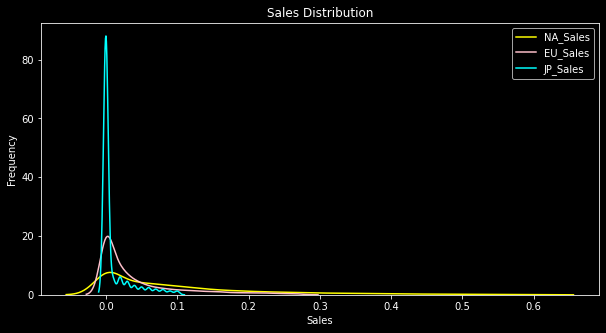

In [68]:
# plot the distribution of the sales 
plt.figure(figsize=(10,5))
plt.style.use('dark_background')
plt.title('Sales Distribution')

Sales= ['NA_Sales','EU_Sales','JP_Sales']
colors=['yellow','pink','aqua']
for i in range(len(Sales)):
    sns.kdeplot(df[Sales[i]], label=Sales[i], color=colors[i])

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Sales by genre

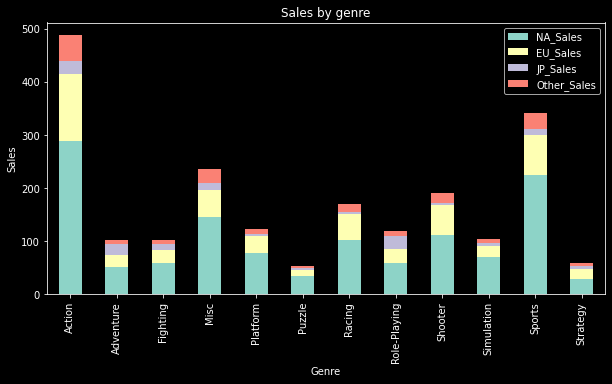

In [69]:
df.groupby(['Genre'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]\
    .sum().plot(kind='bar', stacked=True, figsize=(10,5))
plt.style.use('dark_background')
plt.title('Sales by genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

### A detailed plot 

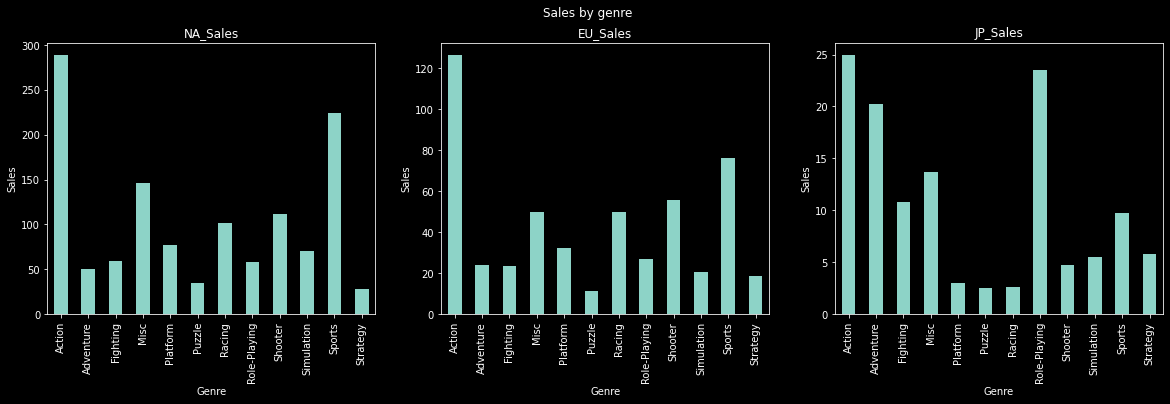

In [70]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.style.use('dark_background')
plt.suptitle('Sales by genre')
Sales= ['NA_Sales','EU_Sales','JP_Sales']
for i in range(len(Sales)):
    df.groupby(['Genre'])[Sales[i]].sum().plot(kind='bar', ax=axes[i])
    axes[i].set_title(Sales[i])
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel('Sales')
plt.show()


### Average Sales for each genre

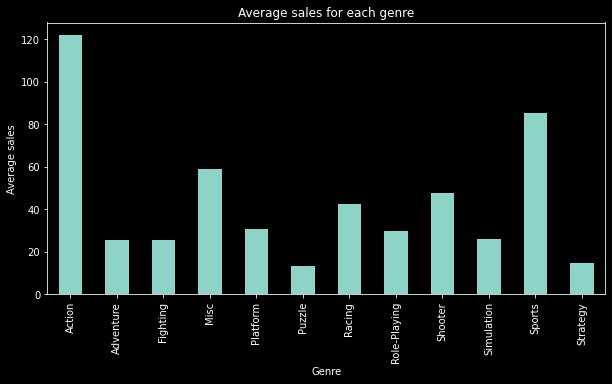

In [19]:
df_genre = df.groupby('Genre').sum(numeric_only=True)
df_genre['Total_Sales'] = df_genre[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean(axis=1)
df_genre['Total_Sales'].plot(kind='bar', figsize=(10,5))
plt.style.use('dark_background')
plt.title('Average sales for each genre', fontsize=20)
plt.xlabel('Genre')
plt.ylabel('Average sales')
plt.show()

## 3- Comparing Expectations to data:
    - The expectations match the data for most of the regions (NA/EU), and for JP they prefer Action and Role playing Genres
        